In [1]:
import pandas as pd
import numpy as np
from gql import gql, Client
from gql.transport.aiohttp import AIOHTTPTransport

In [45]:
transport = AIOHTTPTransport(url="https://api.thegraph.com/subgraphs/name/muranox/uniswap-v3-matic")
client = Client(transport=transport, fetch_schema_from_transport=True)
query = gql(
    """query {
    poolDayDatas(orderBy: date, first: 1000){
    liquidity
    volumeUSD
    volumeToken0
    volumeToken1
    feesUSD
  }
}
"""
)

In [46]:
result = await client.execute_async(query)
print(result)

{'poolDayDatas': [{'liquidity': '945116594245316', 'volumeUSD': '0', 'volumeToken0': '1', 'volumeToken1': '0.000256078805821986', 'feesUSD': '0'}, {'liquidity': '0', 'volumeUSD': '0', 'volumeToken0': '0', 'volumeToken1': '0', 'feesUSD': '0'}, {'liquidity': '0', 'volumeUSD': '0', 'volumeToken0': '0', 'volumeToken1': '0', 'feesUSD': '0'}, {'liquidity': '38688146003680423', 'volumeUSD': '0', 'volumeToken0': '5478.652072', 'volumeToken1': '1.364686863338389322', 'feesUSD': '0'}, {'liquidity': '0', 'volumeUSD': '0', 'volumeToken0': '0', 'volumeToken1': '0', 'feesUSD': '0'}, {'liquidity': '0', 'volumeUSD': '0', 'volumeToken0': '0', 'volumeToken1': '0', 'feesUSD': '0'}, {'liquidity': '53867413708118', 'volumeUSD': '0', 'volumeToken0': '173.054891', 'volumeToken1': '0.04345484962059359', 'feesUSD': '0'}, {'liquidity': '0', 'volumeUSD': '0', 'volumeToken0': '0', 'volumeToken1': '0', 'feesUSD': '0'}, {'liquidity': '3181135172260459122', 'volumeUSD': '0', 'volumeToken0': '2.340154', 'volumeToken1

In [47]:
dataset = pd.DataFrame.from_dict(result)
dataset.head()

,poolDayDatas
0,"{'liquidity': '945116594245316', 'volumeUSD': ..."
1,"{'liquidity': '0', 'volumeUSD': '0', 'volumeTo..."
2,"{'liquidity': '0', 'volumeUSD': '0', 'volumeTo..."
3,"{'liquidity': '38688146003680423', 'volumeUSD'..."
4,"{'liquidity': '0', 'volumeUSD': '0', 'volumeTo..."


In [48]:
dataset.iloc[0][0]

{'liquidity': '945116594245316',
 'volumeUSD': '0',
 'volumeToken0': '1',
 'volumeToken1': '0.000256078805821986',
 'feesUSD': '0'}

In [22]:
data = pd.DataFrame()
for i in range(len(dataset)):
    dict_1 = dataset.iloc[i][0]
    data = data.append(dict_1, ignore_index = True)

In [23]:
data.head()

,feesUSD,liquidity,volumeToken0,volumeToken1,volumeUSD
0,0,945116594245316,1,0.000256078805821986,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,38688146003680423,5478.652072,1.364686863338389322,0
4,0,0,0,0,0


In [24]:
data = data.astype('float')

In [33]:
data['FeesUSD/Liquidity'] = data['feesUSD']/data['liquidity']
data['FeesUSD/volumeUSD'] = data['feesUSD']/data['volumeUSD']

In [34]:
data.head()

,feesUSD,liquidity,volumeToken0,volumeToken1,volumeUSD,FeesUSD/Liquidity,FeesUSD/volumeUSD
0,0.0,9.451166e+14,1.000000,0.000256,0.0,0.0,NaN
1,0.0,0.000000e+00,0.000000,0.000000,0.0,NaN,NaN
2,0.0,0.000000e+00,0.000000,0.000000,0.0,NaN,NaN
3,0.0,3.868815e+16,5478.652072,1.364687,0.0,0.0,NaN
4,0.0,0.000000e+00,0.000000,0.000000,0.0,NaN,NaN


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   feesUSD            1000 non-null   float64
 1   liquidity          1000 non-null   float64
 2   volumeToken0       1000 non-null   float64
 3   volumeToken1       1000 non-null   float64
 4   volumeUSD          1000 non-null   float64
 5   FeesUSD/Liquidity  752 non-null    float64
 6   FeesUSD/volumeUSD  0 non-null      float64
dtypes: float64(7)
memory usage: 54.8 KB


In [36]:
data.describe()

,feesUSD,liquidity,volumeToken0,volumeToken1,volumeUSD,FeesUSD/Liquidity,FeesUSD/volumeUSD
count,1000.0,1.000000e+03,1.000000e+03,1.000000e+03,1000.0,752.0,0.0
mean,0.0,6.725229e+23,4.229159e+11,1.326043e+08,0.0,0.0,NaN
std,0.0,8.392312e+24,1.337370e+13,2.833570e+09,0.0,0.0,NaN
min,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,NaN
25%,0.0,5.047740e+06,1.600000e-06,6.641630e-05,0.0,0.0,NaN
50%,0.0,2.536129e+17,4.112566e+00,6.888556e+00,0.0,0.0,NaN
75%,0.0,2.558187e+20,2.603069e+02,1.110212e+03,0.0,0.0,NaN
max,0.0,2.102712e+26,4.229136e+14,8.532113e+10,0.0,0.0,NaN


In [60]:
import seaborn as sns 
import matplotlib.pyplot as plt

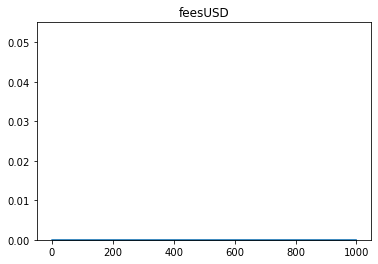

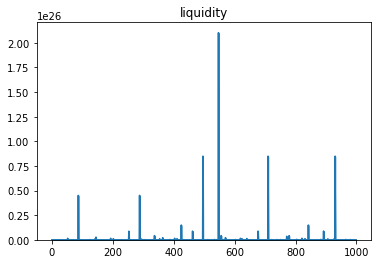

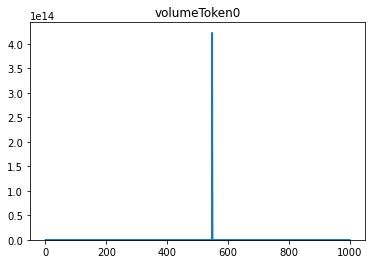

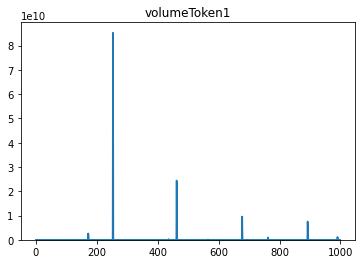

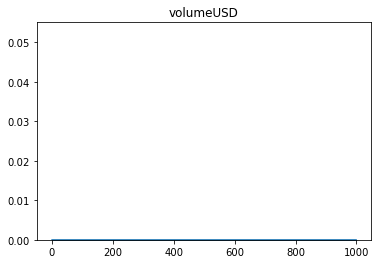

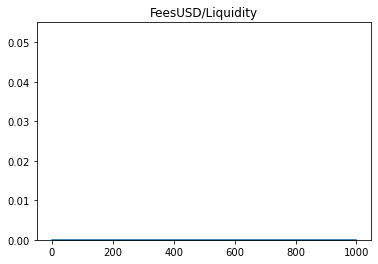

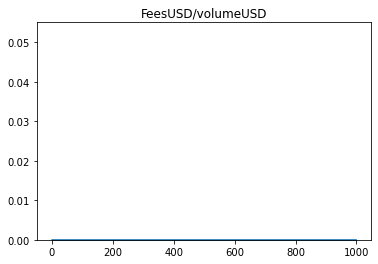

In [38]:
for feature in data.columns:
        data[feature].plot(kind = 'area')
        plt.title(feature)
        plt.show()